# Dependencies and files

## Imports

In [1]:
import os
import time
import gseapy
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import utils.functional_analysis as utils

# Global variables

In [2]:
figures_dir = f'human_specific_genes/figures/'
os.makedirs(figures_dir, exist_ok=True)

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
color_discrete_map = {
    "No significance": "darkblue",
    "p < 0.05": "purple",
    "p < 0.01": "darkorange",
    "p < 0.001": "yellow",
}

## Load files

Load human-specific genes

In [5]:
n_clusters = 7
filepath = f'data/human_specific_genes/human_clusters_edgeR_{n_clusters}.csv'
labels = pd.read_csv(filepath, index_col=0)['0']
hs_genes = labels.index
labels.head()

AMZ2        1
ASAH1       1
BOLA3       1
ATP6V1G1    1
DCXR        1
Name: 0, dtype: int64

Load background genes

In [6]:
with open('data/human_specific_genes/background_genes.txt', 'r') as f:
    background_genes = f.read().split(",")

len(background_genes)

7801

# Functional analysis

In [7]:
import gseapy

In [8]:
enr_bg = gseapy.enrichr(gene_list=hs_genes.to_list(),
                        gene_sets=['GO_Biological_Process_2025', 'Azimuth_Cell_Types_2021', 'SynGO_2024', 'KEGG_2021_Human'],
                        outdir=None, # don't write to disk
                        background=background_genes
                       ).results

In [9]:
enr_bg[enr_bg['Adjusted P-value'] < 0.05].index.size

5

/env/lib/python3.11/site-packages/gseapy/plot.py:753: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


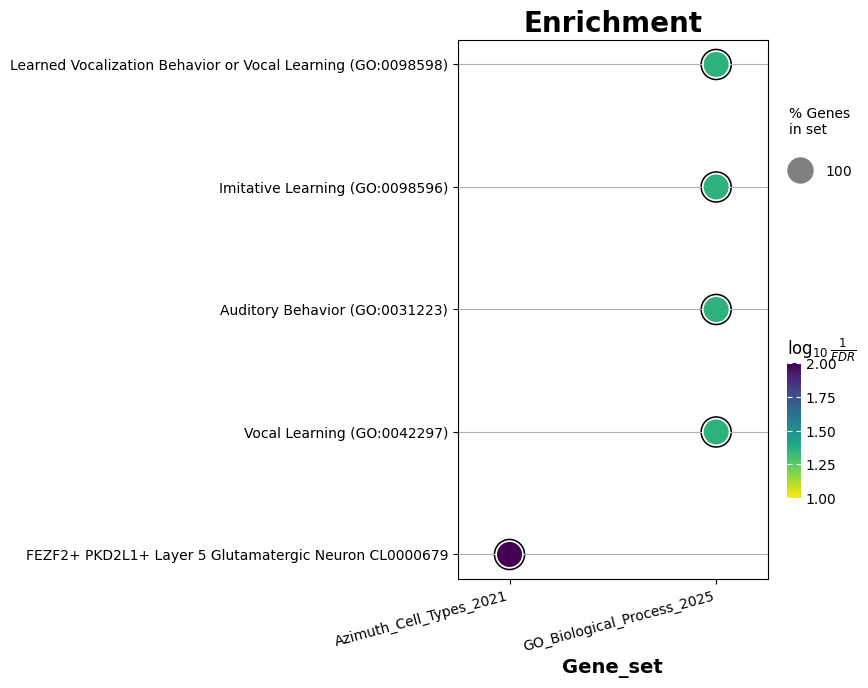

In [10]:
# categorical scatterplot
try:
    ax = gseapy.dotplot(enr_bg,
                column="Adjusted P-value",
                x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
                size=3,
                top_term=6,
                figsize=(5,7),
                title = "Enrichment",
                xticklabels_rot=15, # rotate xtick labels
                show_ring=True, # set to False to revmove outer ring
                marker='o',
                )

    ax.tick_params(axis='both', which='major', labelsize=10)
except e:
    print(e)

In [11]:
gene_clust = list()
results = list()

for label in tqdm(sorted(labels.unique())):
    genes = labels[labels == label].index.tolist()
    descr = f'Genes for spectral clustering ({n_clusters} clusters) of human-specific genes. Cluster label: {label}'
    gene_clust.append(utils.GeneCluster(genes, descr, label, background_genes))
    time.sleep(1)

  0%|          | 0/7 [00:00<?, ?it/s]

## GO_Biological_Process_2025

In [12]:
db_name = 'GO_Biological_Process_2025'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [13]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Intracellular Iron Ion Homeostasis (GO:0006879),1,0.000590,71.888889,534.581805,"[ATP6V1G1, BOLA3]",0.035370,0,0,2,1.451359,1
Response to Increased Oxygen Levels (GO:0036296),2,0.003841,432.722222,2406.791813,[ATP6V1G1],0.047284,0,0,1,1.325284,1
Intracellular Monoatomic Cation Homeostasis (GO:0030003),3,0.005338,22.398256,117.206670,"[ATP6V1G1, BOLA3]",0.047284,0,0,2,1.325284,1
Ceramide Catabolic Process (GO:0046514),4,0.006395,216.305556,1092.841528,[ASAH1],0.047284,0,0,1,1.325284,1
Regulation of Steroid Biosynthetic Process (GO:0050810),5,0.006395,216.305556,1092.841528,[ASAH1],0.047284,0,0,1,1.325284,1


In [14]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 7)].index.unique()
terms.size

32

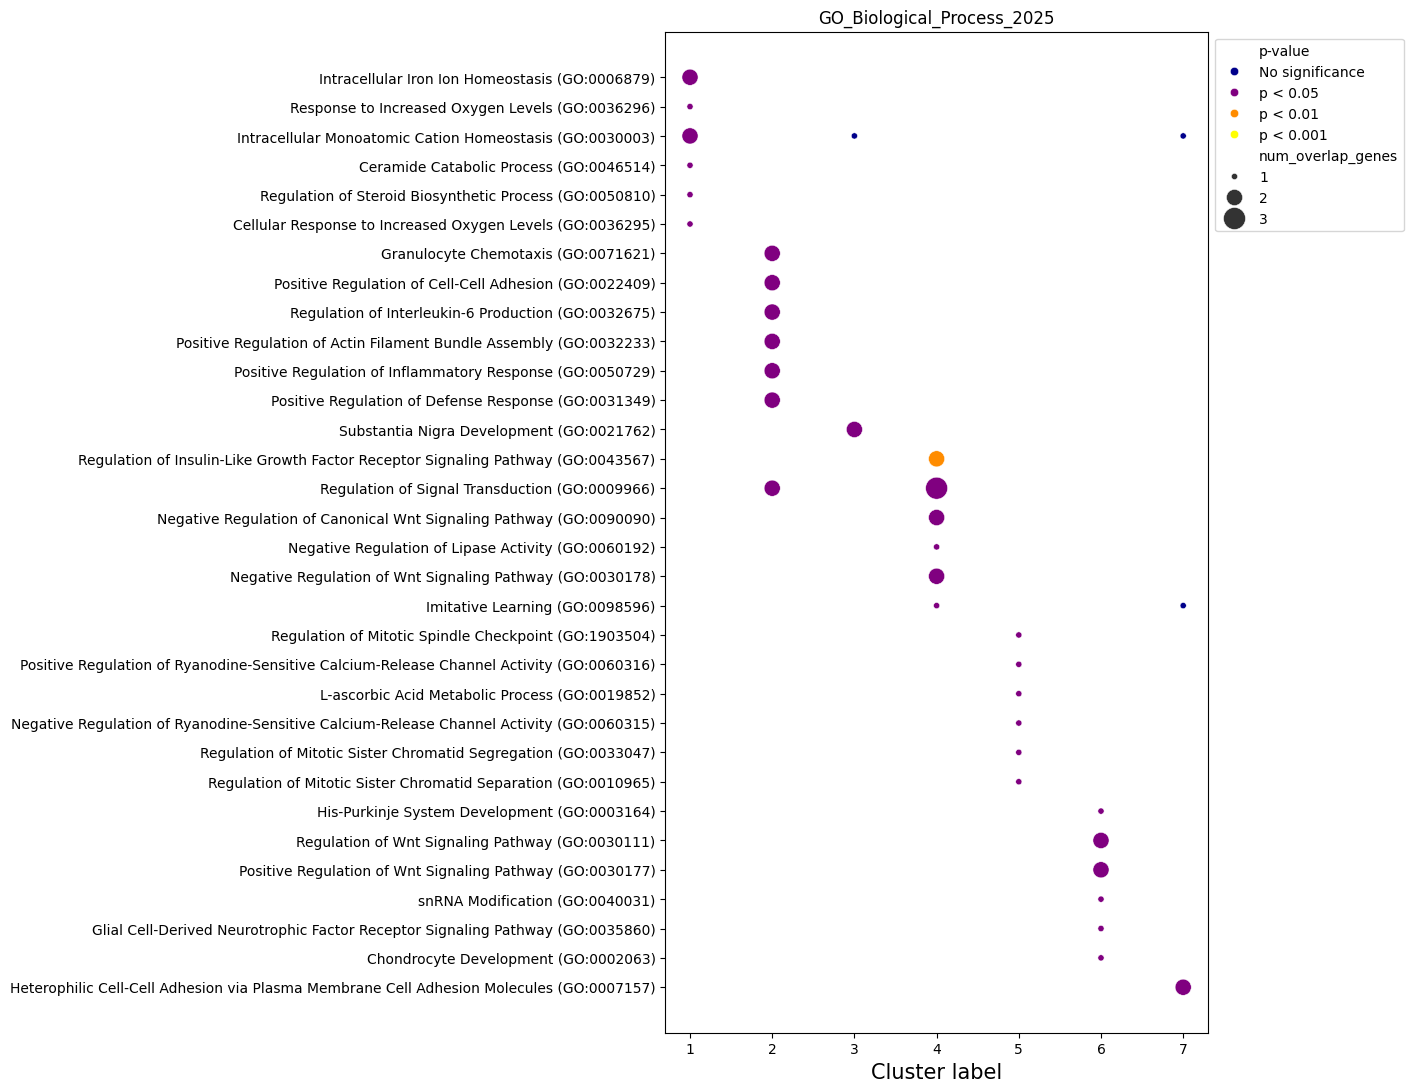

In [15]:
fig, ax = utils.scatter_enrichment(
    enrich_res,
    terms,
    color_discrete_map,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(7, 13),
    dpi=100,
    size_range=(20, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

plt.savefig(f'{figures_dir}/go_biological_processes_2025.jpg', bbox_inches='tight')
plt.savefig(f'{figures_dir}/go_biological_processes_2025.pdf', bbox_inches='tight')
plt.show()

## Azimuth Cell Types 2021


In [16]:
db_name = 'Azimuth_Cell_Types_2021'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [17]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

/tmp/ipykernel_1106/2388961702.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])


,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
RORB+ LNX2+ Layer 3-5 Glutamatergic Neuron CL0000679,1,0.005119,288.444444,1521.507582,[PCP4],0.006395,0,0,1,2.194188,1
VIP+ SLC7A6OS+ Layer 1-6 GABAergic Neuron CL0000617,2,0.006395,216.305556,1092.841528,[PCP4],0.006395,0,0,1,2.194188,1
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0000679,1,0.003841,432.722222,2406.791813,[RALYL],0.011178,0,0,1,1.951650,2
Sst+ GABAergic Neuron 7 CL0000617,2,0.006395,216.305556,1092.841528,[RALYL],0.011178,0,0,1,1.951650,2
Sst+ GABAergic Neuron CL0000617,3,0.007669,173.022222,842.714929,[RALYL],0.011178,0,0,1,1.951650,2


In [18]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

23

(<Figure size 700x1300 with 1 Axes>,
 <Axes: title={'center': 'Azimuth_Cell_Types_2021'}, xlabel='Cluster label'>)

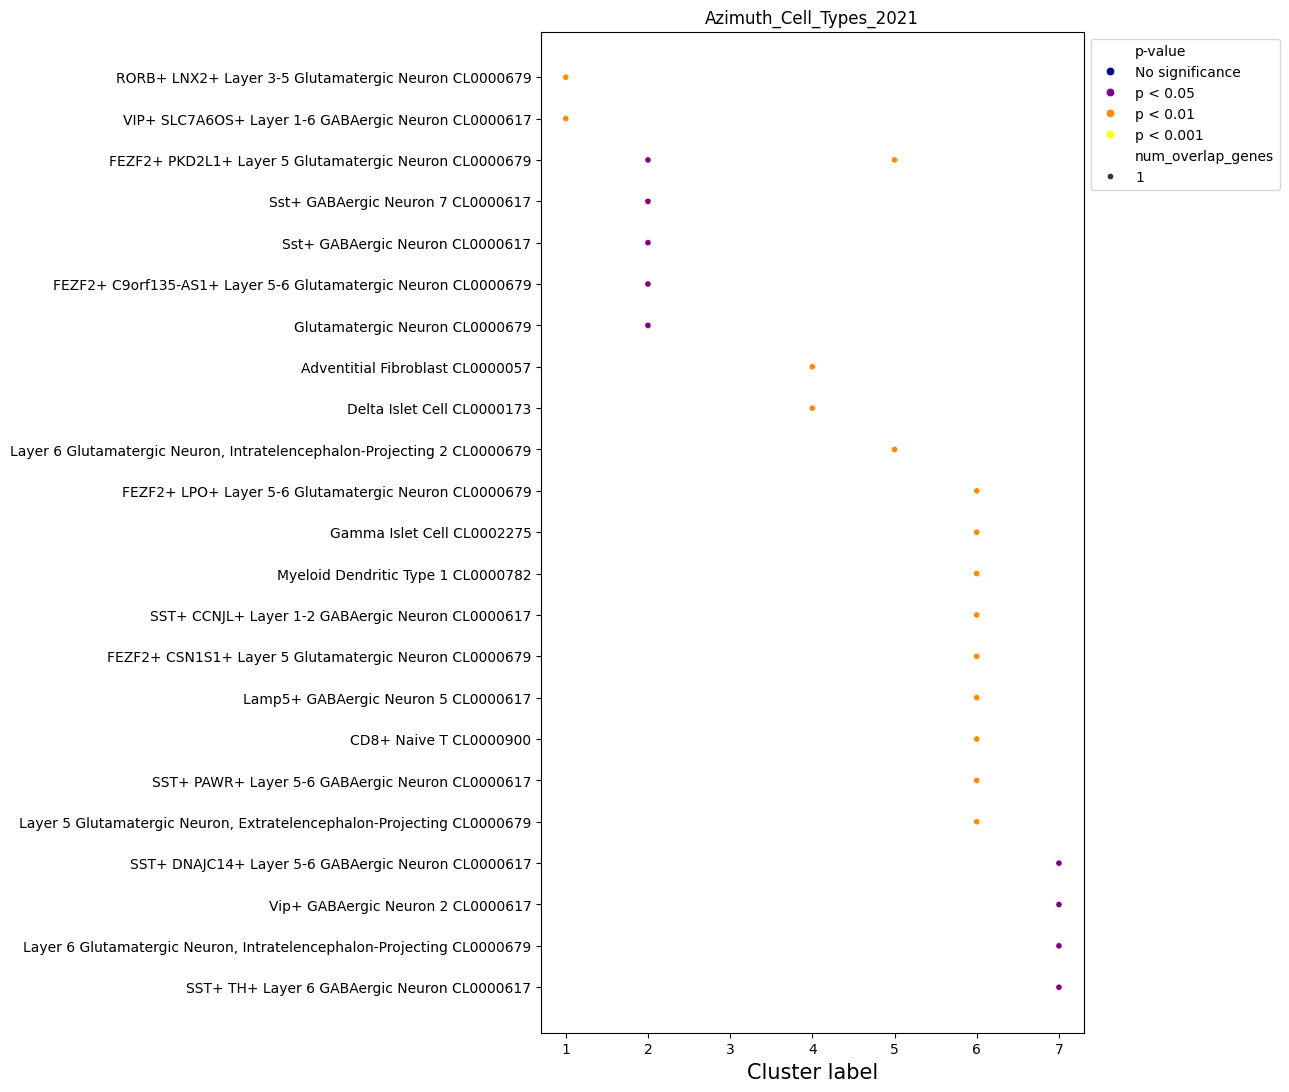

In [19]:
utils.scatter_enrichment(
    enrich_res,
    terms,
    color_discrete_map,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(7, 13),
    dpi=100,
    size_range=(20, 250),
    fontsize_row=5,
    fontsize_axis=15,
)

## SynGO_2024


In [20]:
db_name = 'SynGO_2024'
utils.GeneCluster.enrich_geneclusters(gene_clust,db_name)

In [21]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

,Rank,p-val,Z-score,Combined score,Overlapping genes,Adjusted P-value,Old p-value,Old adjusted p-value,num_overlap_genes,neg_log10(p_adj),cluster_label
Term,,,,,,,,,,,
Synaptic Vesicle Proton Loading (GO:0097401) BP,1,0.016549,72.027778,295.414873,[ATP6V1G1],0.040480,0,0,1,1.392761,1
Extrinsic Component Of Synaptic Vesicle Membrane (GO:0098850) CC,2,0.027862,41.111111,147.198004,[ATP6V1G1],0.040480,0,0,1,1.392761,1
Regulation Of Synapse Organization (GO:0050807) BP,3,0.030360,37.526570,131.141547,[RIMS4],0.040480,0,0,1,1.392761,1
Synapse (GO:0045202) CC,4,0.242945,3.953052,5.593257,[RIMS4],0.242945,0,0,1,0.614493,1
Neurotransmitter Receptor Transport To Postsynaptic Membrane (GO:0098969) BP,1,0.005119,288.444444,1521.507582,[CLSTN1],0.026842,0,0,1,1.571189,2


In [22]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

22

(<Figure size 700x1300 with 1 Axes>,
 <Axes: title={'center': 'SynGO_2024'}, xlabel='Cluster label'>)

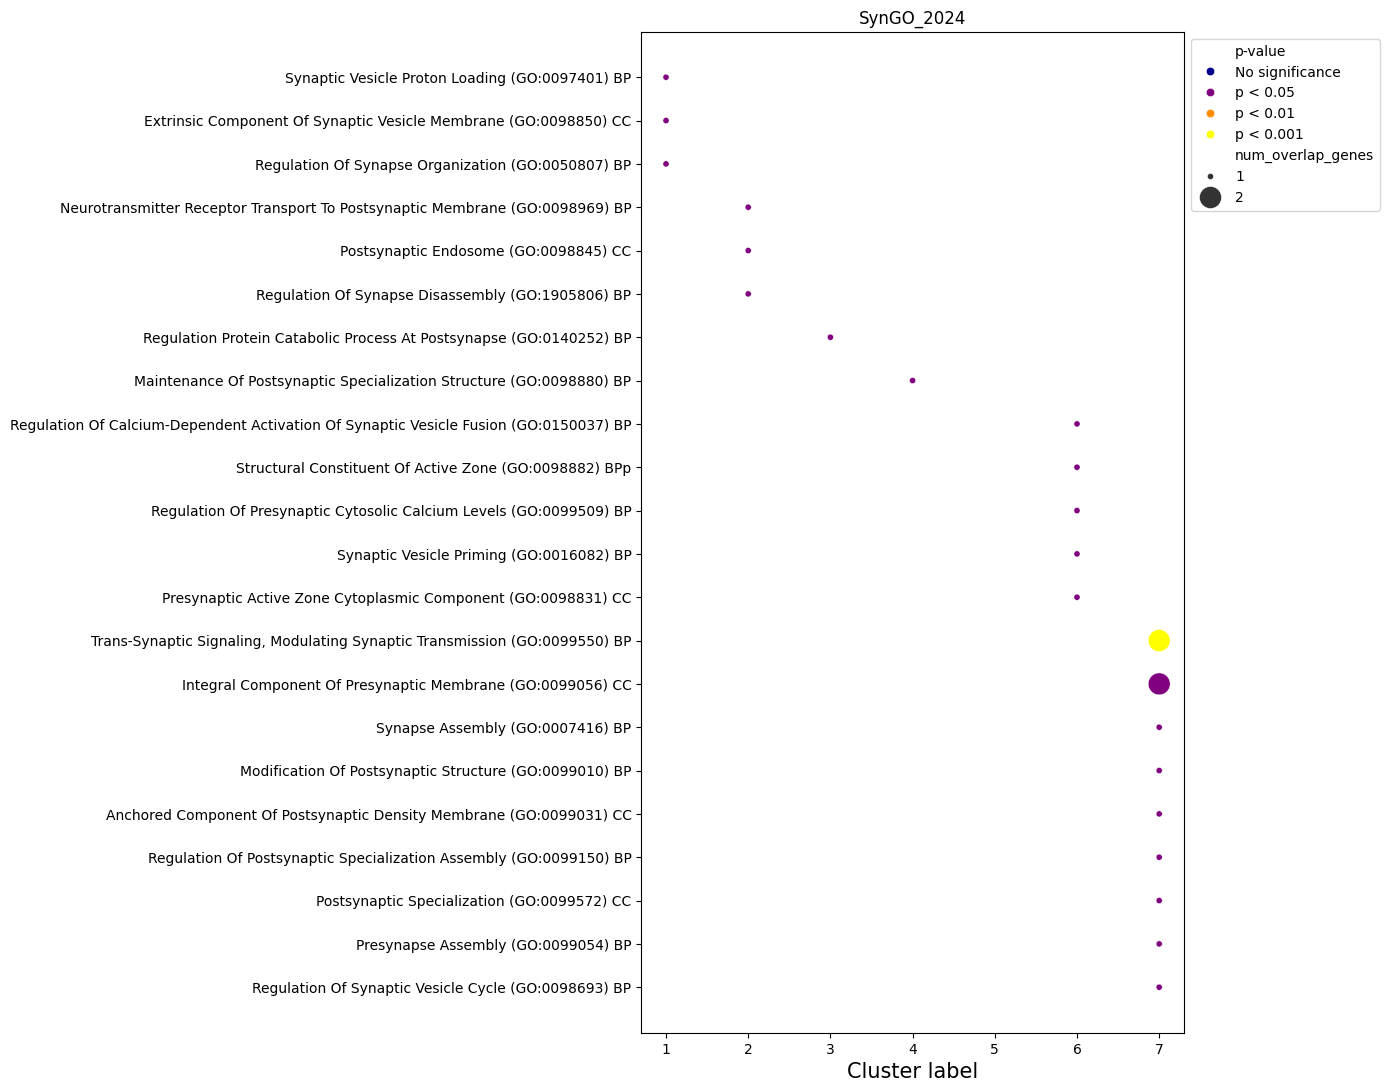

In [23]:
utils.scatter_enrichment(
    enrich_res,
    terms,
    color_discrete_map,
    db_name,
    pval_groups=("No significance", "p < 0.05", "p < 0.01", "p < 0.001"),
    figsize=(7, 13),
    dpi=100,
    size_range=(20, 250),
    fontsize_row=5,
    fontsize_axis=15,
)